In [2]:
# Install mglearn if not already installed
!pip install mglearn

#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.1 MB/s eta 0:00:00


In [20]:
# 1. Load dataset
# Membaca file CSV yang berisi data
file_path = '/content/Automobile.csv'  # Sesuaikan dengan lokasi file

data1 = pd.read_csv(file_path)

In [21]:
# 2. Melihat struktur data
# Menampilkan beberapa baris pertama dan informasi dasar tentang dataset
print(data1.head())
print(data1.info())

     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \

In [22]:
# 3. Data Cleaning
# Menghapus baris yang memiliki nilai kosong untuk memastikan data bersih
data1.dropna(inplace=True)

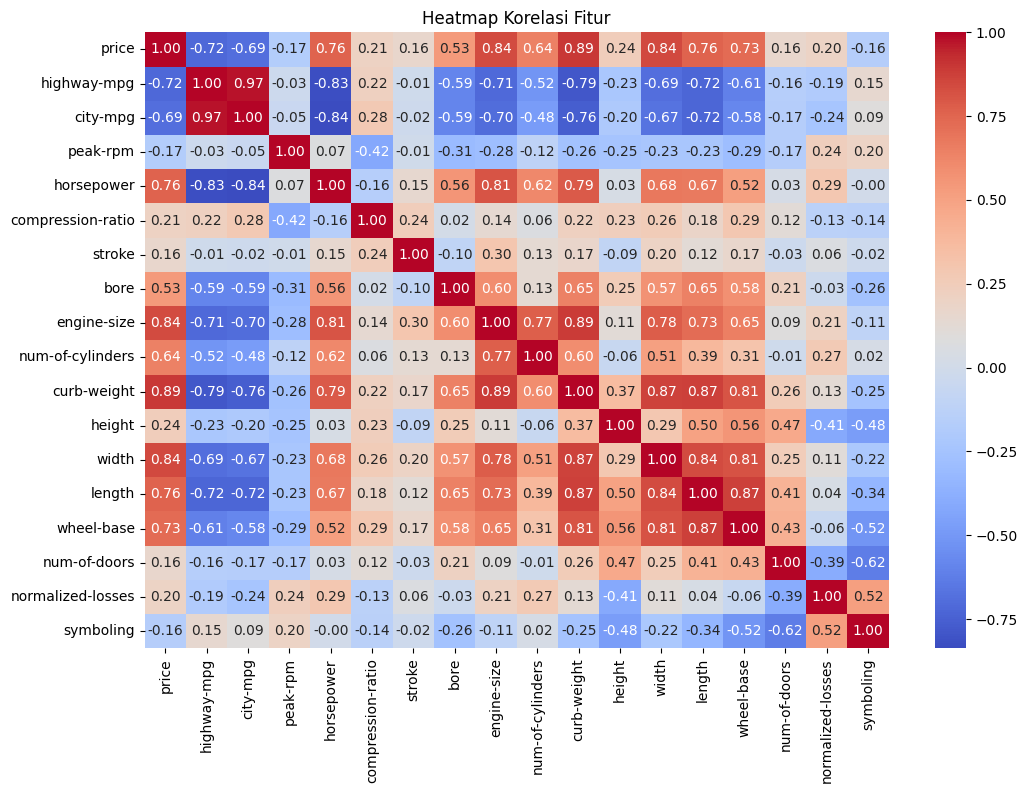

In [23]:
# Menampilkan heatmap korelasi untuk melihat hubungan antar fitur
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data1.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Fitur")
plt.show()

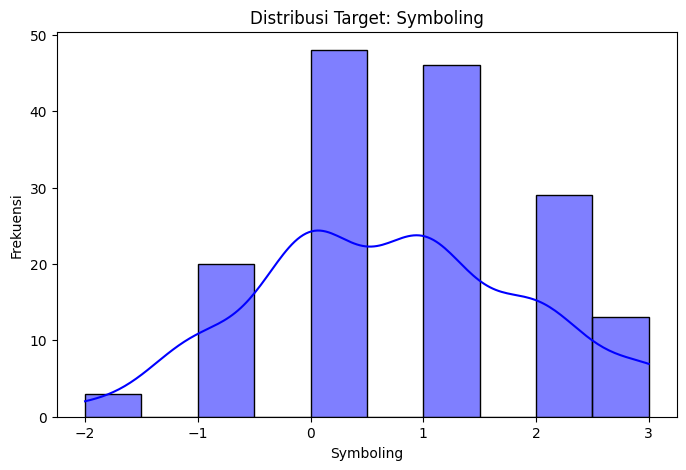

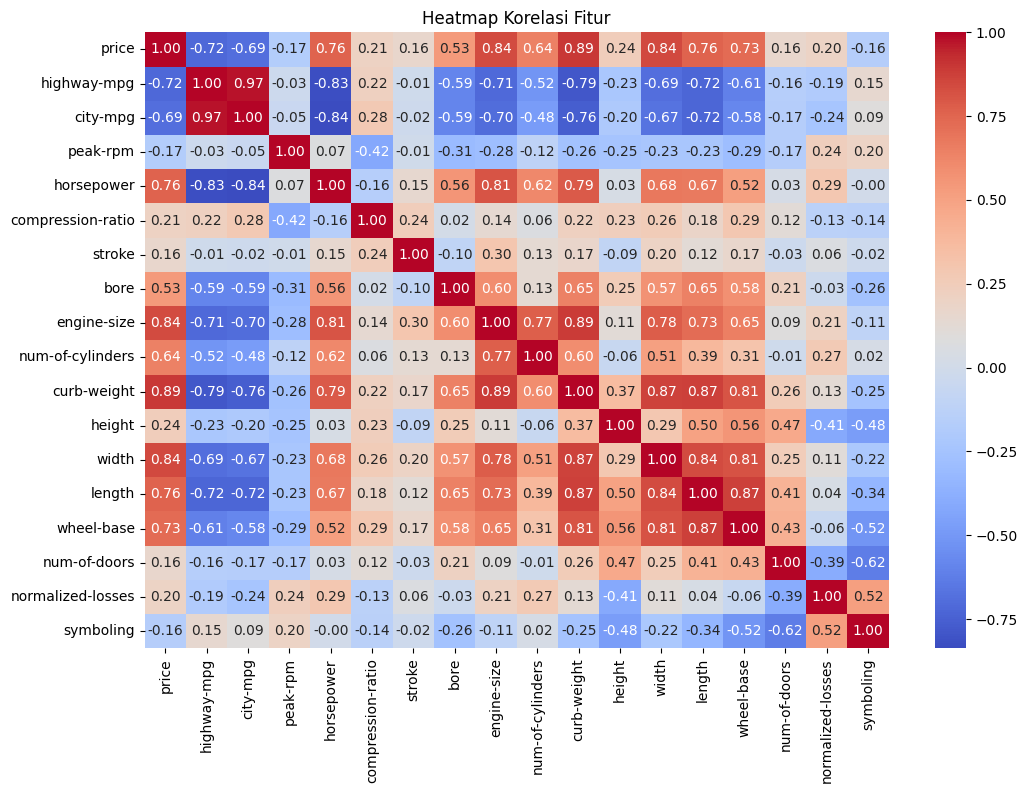

In [25]:
# 4. Visualisasi distribusi target 'symboling'
plt.figure(figsize=(8, 5))
sns.histplot(data1['symboling'], bins=10, kde=True, color='blue')
plt.title("Distribusi Target: Symboling")
plt.xlabel("Symboling")
plt.ylabel("Frekuensi")
plt.show()

# Menampilkan heatmap korelasi untuk melihat hubungan antar fitur
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data1.select_dtypes(include=np.number) # select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [26]:
# 6. Mengubah variabel kategori menjadi numerik (jika ada)
# Menggunakan metode one-hot encoding untuk mengubah kolom kategori menjadi numerik
X = pd.get_dummies(X, drop_first=True)

In [27]:
# 7. Membagi data menjadi train dan test
# Data dibagi menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 8. Inisialisasi dan latih model Linear Regression
# Membuat model regresi linear dan melatihnya dengan data training
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien model
print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_)


Intercept: 8.24140120637161
Koefisien: [-9.76041101e-06  5.83101459e-02 -7.58015808e-02  2.02627158e-04
 -1.99817490e-03  2.59524886e-01 -3.44435152e-01  4.47640524e-01
  8.89519870e-03  1.52898883e-01 -4.51635087e-04 -1.12666979e-01
  1.71408035e-02 -1.97732435e-02 -2.34942873e-02 -2.72685288e-01
  8.84147857e-03  1.05826774e+00 -1.34845165e+00  1.11921583e-12
  7.91234725e-01  4.25474545e-01  5.84737525e-01 -2.72872114e-01
 -1.07993277e+00 -4.21226246e-01 -4.49676095e-01 -3.08146645e-01
 -8.45973018e-01 -1.11603395e+00 -1.43273611e+00 -8.88008139e-01
  6.22460216e-01  1.34845165e+00 -2.07272212e+00 -1.83313018e+00
 -2.12282279e+00 -9.26525366e-01 -1.40776204e+00 -1.34376443e+00
 -1.60843436e+00 -1.20998726e+00 -1.39845847e+00 -1.91090644e+00
 -1.82993068e+00 -1.34417742e+00  8.25400565e-01 -1.07993277e+00
 -1.51686307e+00  8.12535094e-01 -2.34921932e+00]


In [29]:
# 9. Prediksi pada test set
# Menggunakan model yang telah dilatih untuk memprediksi data uji
y_pred = model.predict(X_test)

In [30]:
# 10. Evaluasi Model
# Menghitung metrik evaluasi MSE, RMSE, MAE, dan R-Squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
# 11. Cetak hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R²):", r2)

Mean Squared Error (MSE): 0.6676419589654023
Root Mean Squared Error (RMSE): 0.8170936047757333
Mean Absolute Error (MAE): 0.5769926403525883
R-Squared (R²): 0.5451328236988875


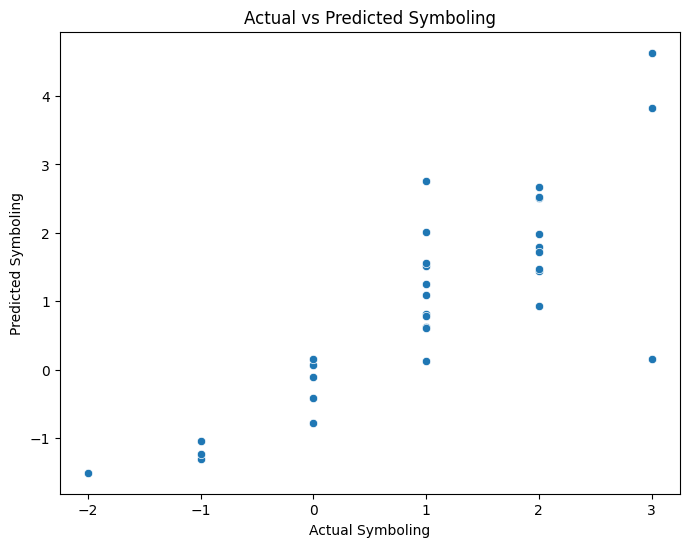

In [32]:
# 12. Visualisasi hasil
# Membuat scatter plot antara nilai aktual dan prediksi untuk melihat seberapa baik model bekerja
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling")
plt.show()



# **Persamaan Regresi Linear:**
# Model regresi linear memprediksi nilai target (y) berdasarkan kombinasi linier dari fitur (X).
# Bentuk umum dari persamaan regresi linear adalah:

#     y = β0 + β1X1 + β2X2 + ... + βnXn + ε

# - β0 adalah intercept (titik potong dengan sumbu Y).
# - β1, β2, ..., βn adalah koefisien regresi yang menunjukkan pengaruh setiap fitur terhadap target.
# - ε adalah error atau residual (selisih antara nilai prediksi dan nilai aktual).

# **Mean Squared Error (MSE):**
# MSE menghitung rata-rata kuadrat dari selisih antara nilai aktual dan prediksi.

#     MSE = (1/n) * Σ (y_i - y_pred_i)^2

# Semakin kecil nilai MSE, semakin baik model karena kesalahan prediksinya lebih kecil.

# **Root Mean Squared Error (RMSE):**
# RMSE adalah akar kuadrat dari MSE, yang mengembalikan kesalahan ke dalam satuan asli target.

#     RMSE = sqrt(MSE)

# RMSE yang lebih rendah menunjukkan model yang lebih akurat dalam memprediksi target.

# **Mean Absolute Error (MAE):**
# MAE menghitung rata-rata dari selisih absolut antara nilai aktual dan prediksi.

#     MAE = (1/n) * Σ |y_i - y_pred_i|

# MAE lebih kecil menunjukkan model yang lebih akurat.

# **R-Squared (R²):**
# R² mengukur seberapa baik model dapat menjelaskan variabilitas dalam data.

#     R² = 1 - (Σ (y_i - y_pred_i)^2 / Σ (y_i - mean(y))^2)

# Nilai R² mendekati 1 menunjukkan bahwa model dapat menjelaskan sebagian besar variasi data, sedangkan nilai mendekati 0 menunjukkan model yang kurang baik.